In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
df = pd.read_csv("C:/workspace/data/seoul_PM/df_PM_pre.csv")
df

,날짜,미세먼지(PM10),초미세먼지(PM2.5),next_PM10,next_PM2.5,next_mask_need,기온(°C),강수량(mm),습도(%),증기압(hPa),...,풍속(16방위)_140,풍속(16방위)_160,풍속(16방위)_180,풍속(16방위)_200,풍속(16방위)_230,풍속(16방위)_250,풍속(16방위)_270,풍속(16방위)_290,풍속(16방위)_320,풍속(16방위)_340
0,2008-01-01,36.834558,13.160000,35.655399,16.006667,0,-6.337500,0.0,47.541667,1.700000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,1.075000,2.420833,0.079167,0.191667
1,2008-01-02,35.655399,16.006667,53.705927,25.015480,0,-3.720833,0.0,49.708333,2.175000,...,0.0,0.000000,0.0000,0.050000,0.000000,0.700000,0.441667,0.783333,0.233333,0.000000
2,2008-01-03,53.705927,25.015480,78.231280,37.075943,1,0.866667,0.0,51.500000,3.250000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.254167,0.908333,0.229167,0.000000,0.104167
3,2008-01-04,78.231280,37.075943,64.480598,28.653605,0,-0.379167,0.0,55.583333,3.200000,...,0.0,0.000000,0.0000,0.145833,0.000000,0.100000,0.720833,0.708333,0.079167,0.033333
4,2008-01-05,64.480598,28.653605,78.442576,40.808084,1,1.504167,0.0,60.500000,4.000000,...,0.0,0.000000,0.0000,0.000000,0.062500,0.212500,0.437500,0.437500,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,2022-12-26,46.834038,34.917054,49.191594,36.051107,1,-3.979167,0.0,68.000000,3.054167,...,0.0,0.000000,0.0000,0.058333,0.025000,0.250000,0.150000,0.108333,0.116667,0.079167
5453,2022-12-27,49.191594,36.051107,34.570833,21.232756,0,-2.641667,0.0,69.208333,3.441667,...,0.0,0.000000,0.0000,0.000000,0.054167,0.037500,0.041667,0.562500,0.025000,0.041667
5454,2022-12-28,34.570833,21.232756,30.307906,18.484193,0,-2.916667,0.1,58.916667,2.916667,...,0.0,0.000000,0.0000,0.000000,0.104167,0.000000,1.012500,0.766667,0.433333,0.000000
5455,2022-12-29,30.307906,18.484193,38.443462,27.576923,0,-3.295833,0.0,54.375000,2.600000,...,0.0,0.041667,0.0000,0.087500,0.000000,0.379167,0.275000,0.475000,0.058333,0.000000


In [2]:
col_X1 = ['미세먼지(PM10)', '초미세먼지(PM2.5)', '기온(°C)', '강수량(mm)', '습도(%)', '적설(cm)']
col_X2 = list(df.columns[-16:])
col_X2

['풍속(16방위)_0',
 '풍속(16방위)_20',
 '풍속(16방위)_50',
 '풍속(16방위)_70',
 '풍속(16방위)_90',
 '풍속(16방위)_110',
 '풍속(16방위)_140',
 '풍속(16방위)_160',
 '풍속(16방위)_180',
 '풍속(16방위)_200',
 '풍속(16방위)_230',
 '풍속(16방위)_250',
 '풍속(16방위)_270',
 '풍속(16방위)_290',
 '풍속(16방위)_320',
 '풍속(16방위)_340']

In [3]:
col_X = col_X1 + col_X2
X = df[col_X]
y = df['next_mask_need']

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='next_mask_need', ylabel='count'>

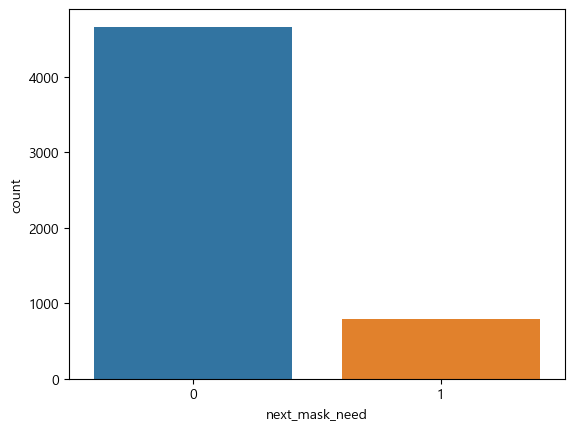

In [4]:
sns.countplot('next_mask_need', data=df)

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=col_X )
y_samp = pd.DataFrame(data=y_sample,columns=['next_mask_need'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["next_mask_need"].value_counts()

0    794
1    794
Name: next_mask_need, dtype: int64

In [6]:
X=df_samp[col_X]
y=df_samp["next_mask_need"]

In [8]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.436811
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.370      
Dependent Variable: next_mask_need   AIC:              1431.3113  
Date:               2023-04-18 17:00 BIC:              1549.4564  
No. Observations:   1588             Log-Likelihood:   -693.66    
Df Model:           21               LL-Null:          -1100.7    
Df Residuals:       1566             LLR p-value:      9.1804e-159
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
미세먼지(PM10)     -0.0043    0.0083  -0.5169  0.6052  -0.0206   0.0120
초미세먼지(PM2.5)    0.1370    0.0160   8.5725  0.0000   0.1056   0.1683
기온(°C)         -0.0475    0.0077  -6.1430  0.0000  -0.0627  -0.0324
강수량(mm)        -0.0075    0.0082  -0.9165  0.3594  -0.0236   0.0086
습도(%)          -0.0166    0.0049  -3.3910  0.0007  -0.0262  -0.0070
적설(cm)          0.0019    0.0023   0.8599  0.3899  -0.0025   0.0064
풍속(16방위)_0     -2.1041    1.2398  -1.6972  0.0897  -4.5340   0.3258
풍속(16방위)_20    -2.3349    0.6025  -3.8755  0.0001  -3.5157  -1.1540
풍속(16방위)_50    -0.8360    0.2780  -3.0072  0.0026  -1.3809  -0.2911
풍속(16방위)_70    -0.9068    0.2540  -3.5700  0.0004  -1.4047  -0.4090
풍속(16방위)_90    -2.4396    0.6222  -3.9210  0.0001  -3.6591  -1.2201
풍속(16방위)_110   -0.3809    0.4958  -0.7683  0.4423  -1.3526   0.5908
풍속(16방위)_140   -2.1353    1.3711  -1.5574  0.1194  -4.8227   0.5520
풍속(16방위)_160   -0.9952    1.0245  -0.9714  0.3313  -3.0031   1.0127
풍속(16방위)_180   -0.1538    0.8671  -0.1774  0.8592  -1.8532   1.5456
풍속(16방위)_200   -0.4741    0.3440  -1.3782  0.1681  -1.1484   0.2002
풍속(16방위)_230    0.1112    0.1995   0.5577  0.5771  -0.2797   0.5022
풍속(16방위)_250   -0.0405    0.2301  -0.1761  0.8602  -0.4914   0.4104
풍속(16방위)_270   -0.7253    0.1812  -4.0021  0.0001  -1.0805  -0.3701
풍속(16방위)_290   -1.2505    0.2059  -6.0721  0.0000  -1.6542  -0.8469
풍속(16방위)_320   -1.1045    0.3899  -2.8326  0.0046  -1.8688  -0.3403
풍속(16방위)_340   -2.0344    0.7129  -2.8536  0.0043  -3.4317  -0.6371
==================================================================

"""

In [9]:
cols = ['초미세먼지(PM2.5)', '기온(°C)', '습도(%)',
        '풍속(16방위)_20', '풍속(16방위)_50', '풍속(16방위)_70', '풍속(16방위)_90',
        '풍속(16방위)_270', '풍속(16방위)_290', '풍속(16방위)_320', '풍속(16방위)_340']
X=df_samp[cols]
model=sm.Logit(y,X)
result=model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.441605
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.363      
Dependent Variable: next_mask_need   AIC:              1424.5387  
Date:               2023-04-18 17:03 BIC:              1483.6113  
No. Observations:   1588             Log-Likelihood:   -701.27    
Df Model:           10               LL-Null:          -1100.7    
Df Residuals:       1577             LLR p-value:      3.5627e-165
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
초미세먼지(PM2.5)    0.1309    0.0071  18.4005  0.0000   0.1170   0.1449
기온(°C)         -0.0513    0.0074  -6.9399  0.0000  -0.0657  -0.0368
습도(%)          -0.0213    0.0038  -5.6396  0.0000  -0.0287  -0.0139
풍속(16방위)_20    -2.2640    0.5603  -4.0404  0.0001  -3.3622  -1.1657
풍속(16방위)_50    -0.7679    0.2619  -2.9317  0.0034  -1.2813  -0.2545
풍속(16방위)_70    -0.7852    0.2393  -3.2811  0.0010  -1.2543  -0.3162
풍속(16방위)_90    -2.8726    0.5795  -4.9571  0.0000  -4.0084  -1.7368
풍속(16방위)_270   -0.6256    0.1658  -3.7729  0.0002  -0.9506  -0.3006
풍속(16방위)_290   -1.1426    0.1889  -6.0499  0.0000  -1.5128  -0.7725
풍속(16방위)_320   -1.0754    0.3751  -2.8668  0.0041  -1.8106  -0.3402
풍속(16방위)_340   -2.3716    0.6746  -3.5153  0.0004  -3.6939  -1.0493
==================================================================

"""

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', LogisticRegression(random_state=0)),
])
params = {
'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 1.0}
0.785270654254497


In [11]:
scores=[]

In [12]:
scores.append(grid.best_score_)
scores

[0.785270654254497]

In [13]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', DecisionTreeClassifier(random_state=0)),
])
params = {
'clf__max_depth': list(range(3,6))
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3}
0.7726623152738643


In [14]:
scores.append(grid.best_score_)
scores

[0.785270654254497, 0.7726623152738643]

In [15]:
tree=grid.best_estimator_['clf']

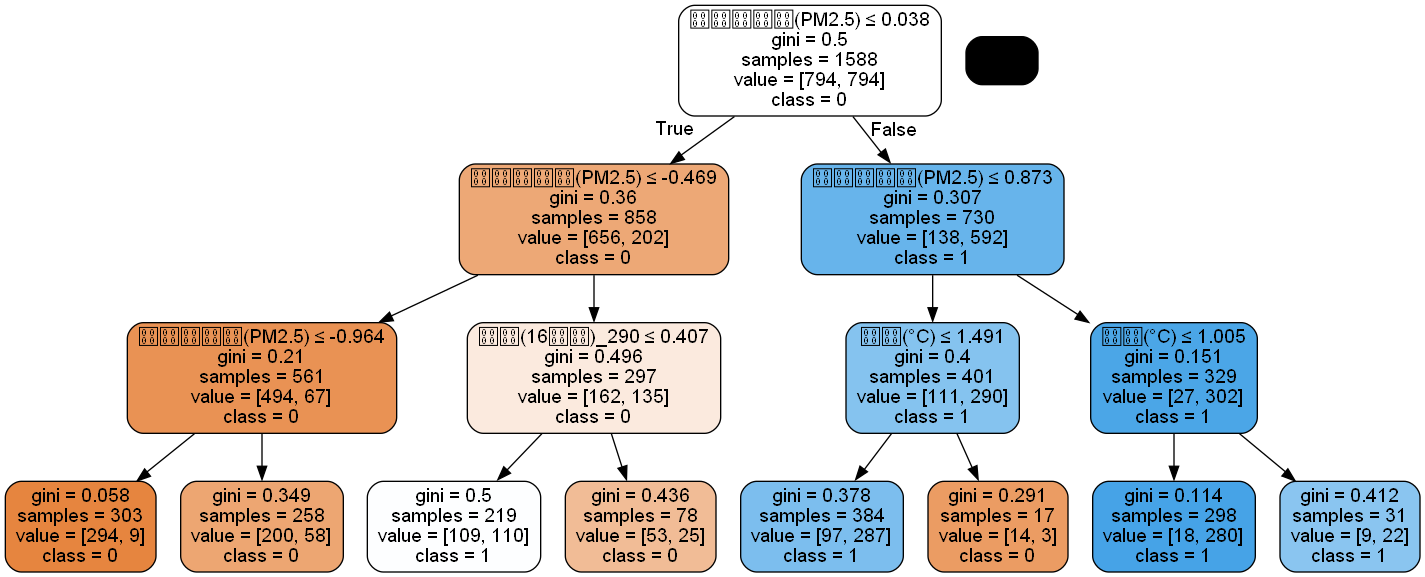

In [16]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None,
feature_names=cols, class_names=["0","1"], filled=True,
rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

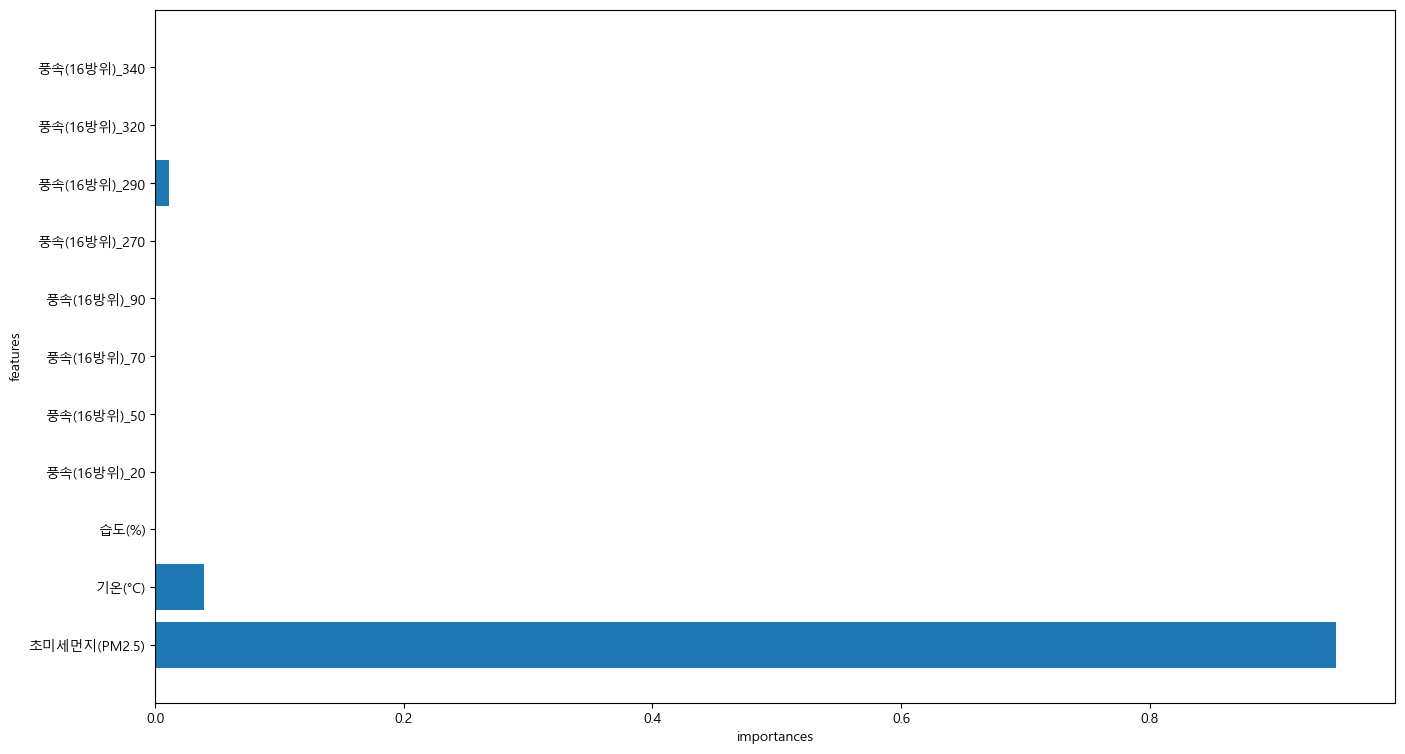

In [17]:
import numpy as np
def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,
    align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_tree(tree)

In [18]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', RandomForestClassifier(random_state=0)),
])
params = {
'clf__max_depth': list(range(3,6)),
'clf__n_estimators': list(range(10,110,10)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 5, 'clf__n_estimators': 50}
0.7770874201947428


In [19]:
scores.append(grid.best_score_)
scores

[0.785270654254497, 0.7726623152738643, 0.7770874201947428]

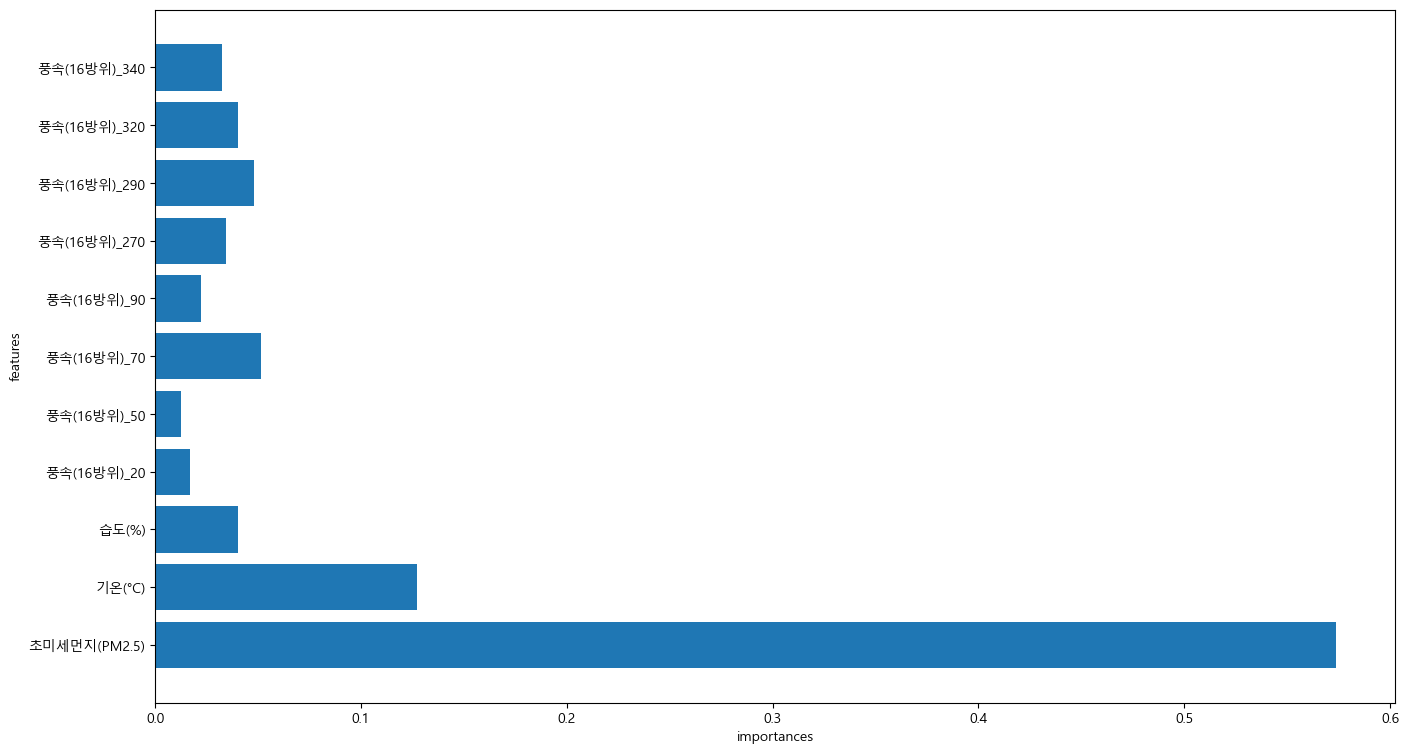

In [20]:
rf=grid.best_estimator_['clf']
plot_tree(rf)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', KNeighborsClassifier()),
])
params = {
'clf__n_neighbors': list(range(1,11)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

{'clf__n_neighbors': 9}
0.7506295252701788


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

In [22]:
scores.append(grid.best_score_)
scores

[0.785270654254497, 0.7726623152738643, 0.7770874201947428, 0.7506295252701788]

In [23]:
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', MLPClassifier(random_state=0, max_iter=5000)),
])
params = {
'clf__hidden_layer_sizes': [(50,), (100,), (50,50),
(100,100)],
'clf__activation': ['tanh', 'relu'],
'clf__alpha': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        MLPClassifier(max_iter=5000,
                                                      random_state=0))]),
             param_grid={'clf__activation': ['tanh', 'relu'],
                         'clf__alpha': [0.001, 0.01, 0.1],
                         'clf__hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                     (100, 100)]},
             scoring='accuracy')

In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (50,)}
0.7456028343498472


In [25]:
scores.append(grid.best_score_)
scores

[0.785270654254497,
 0.7726623152738643,
 0.7770874201947428,
 0.7506295252701788,
 0.7456028343498472]

In [26]:
from sklearn.svm import SVC
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', SVC(random_state=0)),
])
params = {
'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
'clf__gamma': [0.0001, 0.001, 0.01, 0.1],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 1, 'clf__gamma': 0.001}
0.787165769043288


In [27]:
scores.append(grid.best_score_)
scores

[0.785270654254497,
 0.7726623152738643,
 0.7770874201947428,
 0.7506295252701788,
 0.7456028343498472,
 0.787165769043288]

In [28]:
from scikeras.wrappers import KerasClassifier
from keras import models
from keras import layers
def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Dense(units=16,
    activation="relu",
    input_shape=(X.shape[1],)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1,
    activation="sigmoid"))
    network.compile(loss='binary_crossentropy',
    optimizer=optimizer, # 옵티마이저
    metrics=["accuracy"]) # 성능 지표
    return network

In [29]:
neural_network = KerasClassifier(model=create_network,
verbose=0)
pipe=Pipeline([
('scaler',StandardScaler()),
('clf',neural_network)
])
params={
'clf__epochs': [50, 100],
'clf__batch_size': [32,64,128],
'clf__optimizer': ["rmsprop", "adam"],
}
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=3)
grid_result = grid.fit(X, y)

In [30]:
grid_result.best_params_

{'clf__batch_size': 64, 'clf__epochs': 50, 'clf__optimizer': 'rmsprop'}

In [31]:
scores.append(grid.best_score_)
scores

[0.785270654254497,
 0.7726623152738643,
 0.7770874201947428,
 0.7506295252701788,
 0.7456028343498472,
 0.787165769043288,
 0.7852742209699088]

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']
[0.78527065 0.77266232 0.77708742 0.75062953 0.74560283 0.78716577
 0.78527422]
최적의 모형: SVM
최고 정확도: 0.787165769043288


Text(0, 0.5, 'Accuracy')

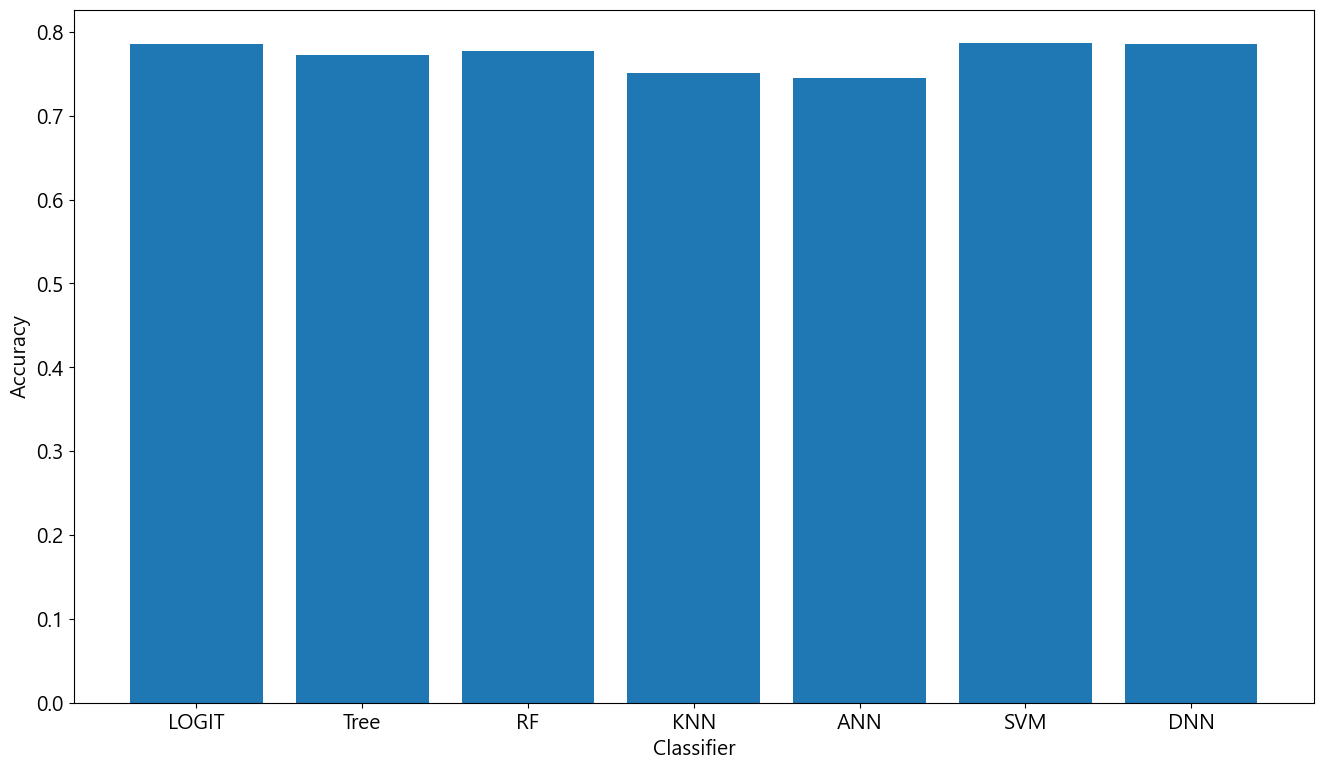

In [32]:
methods=["LOGIT","Tree","RF","KNN","ANN","SVM","DNN"]
scores_arr=np.array(scores)
max_rate=np.max(scores_arr)
idx=np.argmax(scores_arr)
print(methods)
print(scores_arr)
print("최적의 모형:",methods[idx])
print("최고 정확도:",max_rate)
plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")